In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a classification dataset
from sklearn.datasets import make_circles

# Set n_samples to 1000
n_samples=1000

# Features and Labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
len(X)

1000

In [4]:
# Let's split our data into training and testing sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [5]:
# Build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model.compile(loss="binary_crossentropy", # We can use strings here too
              optimizer="Adam", # Same as tf.keras.optimizers.Adam() with default settings
              metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) 

# Fit the model ( passing the lr_scheduler callback)
history = model.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=1)

Epoch 1/100
25/25 [==============================] - 0s 903us/step - loss: 0.7132 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 792us/step - loss: 0.7125 - accuracy: 0.5025 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 792us/step - loss: 0.7118 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 834us/step - loss: 0.7110 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 679us/step - loss: 0.7103 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 724us/step - loss: 0.7095 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 720us/step - loss: 0.7086 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 766us/step - loss: 0.7077 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='epochs'>

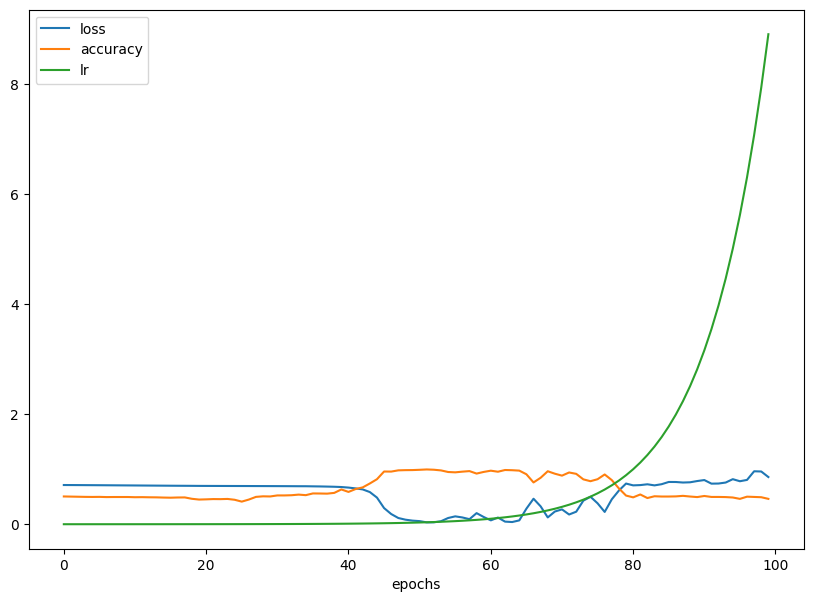

In [6]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")